<a href="https://colab.research.google.com/github/Mennakurdi/fraud_detection_project/blob/menna-branch/notebooks/01_data_exploration_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
import pandas as pd

bene = pd.read_csv('/content/Train_Beneficiarydata-1542865627584.csv')
inpatient = pd.read_csv('/content/Train_Inpatientdata-1542865627584.csv')
outpatient = pd.read_csv('/content/Train_Outpatientdata-1542865627584.csv')
labels = pd.read_csv('/content/Train-1542865627584.csv')


In [ ]:
# ============================================================
# Cell 3 – Quick structure check
# ============================================================
print("Beneficiary data:")
print(bene.info(), "\n")

print("Inpatient data:")
print(inpatient.info(), "\n")

print("Outpatient data:")
print(outpatient.info(), "\n")

print("Labels:")
print(labels.info(), "\n")

print("Head of labels:")
display(labels.head())


Beneficiary data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12745 entries, 0 to 12744
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BeneID                           12745 non-null  object 
 1   DOB                              12745 non-null  object 
 2   DOD                              121 non-null    object 
 3   Gender                           12745 non-null  int64  
 4   Race                             12745 non-null  int64  
 5   RenalDiseaseIndicator            12745 non-null  object 
 6   State                            12745 non-null  int64  
 7   County                           12745 non-null  int64  
 8   NoOfMonths_PartACov              12745 non-null  int64  
 9   NoOfMonths_PartBCov              12745 non-null  int64  
 10  ChronicCond_Alzheimer            12745 non-null  int64  
 11  ChronicCond_Heartfailure         12745 non-null  int64  
 12  

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [ ]:
print("Providers in inpatient: ", inpatient['Provider'].nunique())
print("Providers in outpatient:", outpatient['Provider'].nunique())
print("Providers in labels:    ", labels['Provider'].nunique())

print("Overlap between inpatient & labels:",
      len(set(inpatient['Provider']).intersection(set(labels['Provider']))))

print("Overlap between outpatient & labels:",
      len(set(outpatient['Provider']).intersection(set(labels['Provider']))))


Providers in inpatient:  1275
Providers in outpatient: 3581
Providers in labels:     5410
Overlap between inpatient & labels: 1275
Overlap between outpatient & labels: 3581


In [ ]:
print(bene.head())
print(inpatient.head())
print(outpatient.head())
print(labels.head())

print(bene.info())
print(inpatient.info())
print(outpatient.info())
print(labels.info())


      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2 

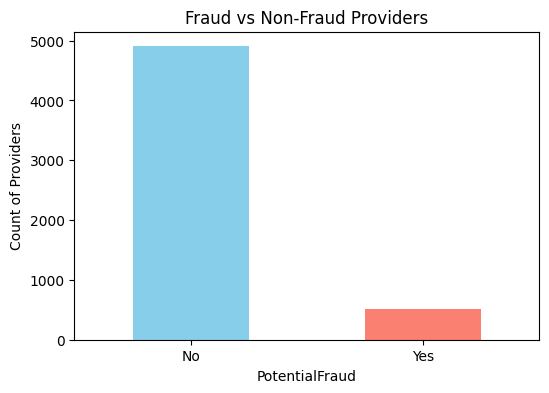

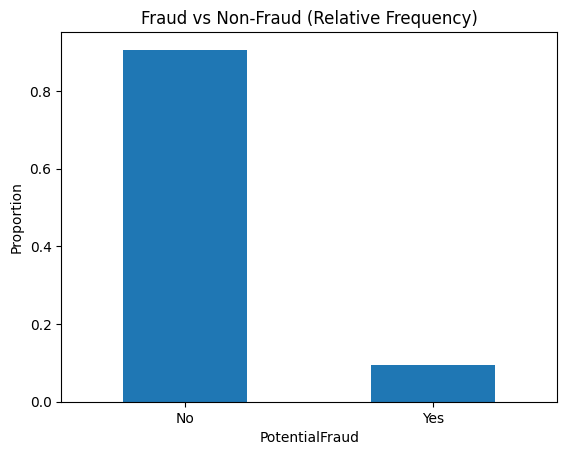

In [ ]:
plt.figure(figsize=(6,4))
labels['PotentialFraud'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Fraud vs Non-Fraud Providers")
plt.xlabel("PotentialFraud")
plt.ylabel("Count of Providers")
plt.xticks(rotation=0)
plt.show()
labels['PotentialFraud'].value_counts(normalize=True).plot(kind='bar')
plt.title("Fraud vs Non-Fraud (Relative Frequency)")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

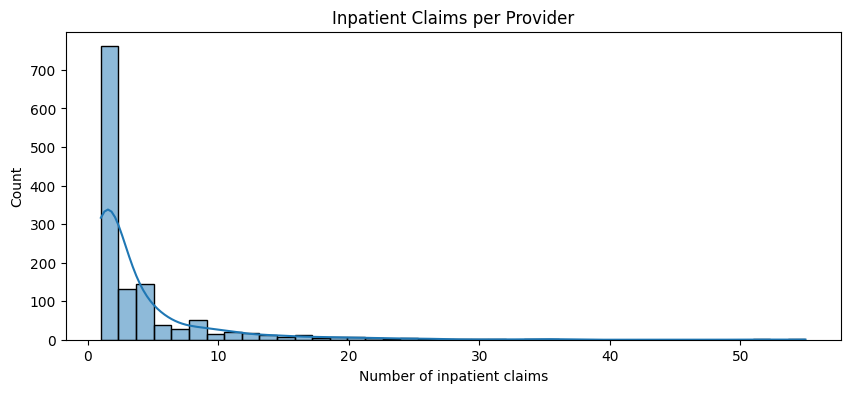

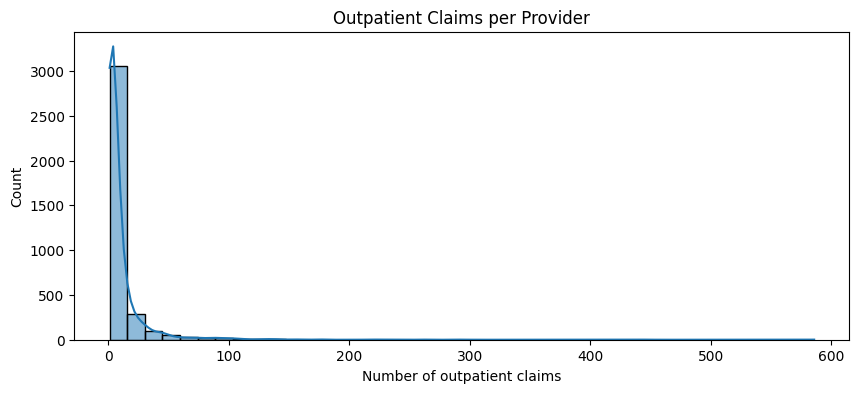

In [ ]:
# ============================================================
# Cell 6 – Claim counts per provider (raw claim-level EDA)
# ============================================================
inp_claims_per_provider = inpatient['Provider'].value_counts()
out_claims_per_provider = outpatient['Provider'].value_counts()

plt.figure(figsize=(10,4))
sns.histplot(inp_claims_per_provider, bins=40, kde=True)
plt.title("Inpatient Claims per Provider")
plt.xlabel("Number of inpatient claims")
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(out_claims_per_provider, bins=40, kde=True)
plt.title("Outpatient Claims per Provider")
plt.xlabel("Number of outpatient claims")
plt.show()


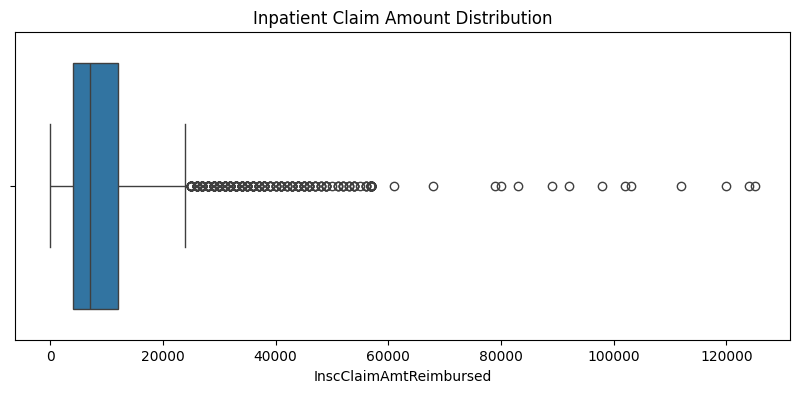

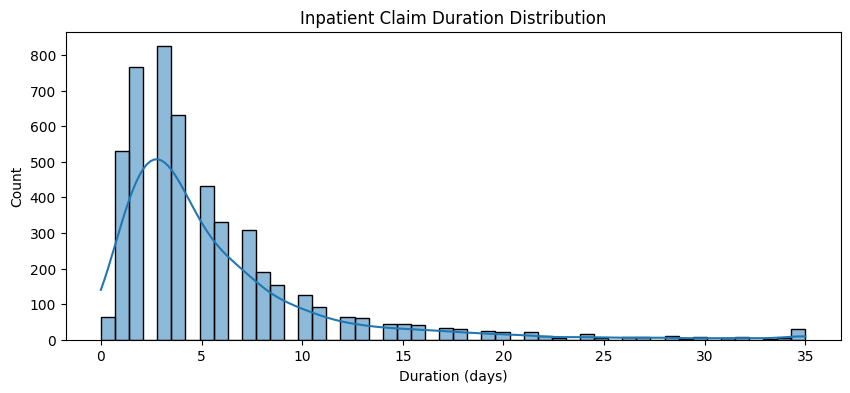

In [ ]:
# ============================================================
# Cell 7 – Inpatient reimbursement + duration distributions
# ============================================================
plt.figure(figsize=(10,4))
sns.boxplot(x=inpatient['InscClaimAmtReimbursed'])
plt.title("Inpatient Claim Amount Distribution")
plt.xlabel("InscClaimAmtReimbursed")
plt.show()

# Convert inpatient dates to datetime and compute duration
inpatient['ClaimStartDt'] = pd.to_datetime(inpatient['ClaimStartDt'])
inpatient['ClaimEndDt'] = pd.to_datetime(inpatient['ClaimEndDt'])
inpatient['ClaimDuration'] = (inpatient['ClaimEndDt'] - inpatient['ClaimStartDt']).dt.days

plt.figure(figsize=(10,4))
sns.histplot(inpatient['ClaimDuration'], bins=50, kde=True)
plt.title("Inpatient Claim Duration Distribution")
plt.xlabel("Duration (days)")
plt.show()


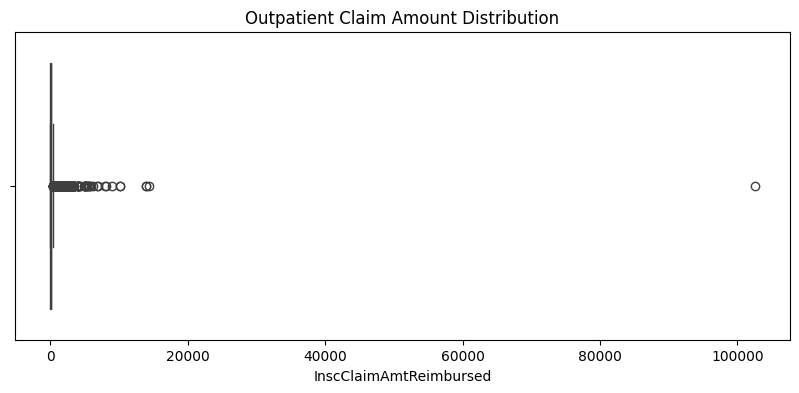

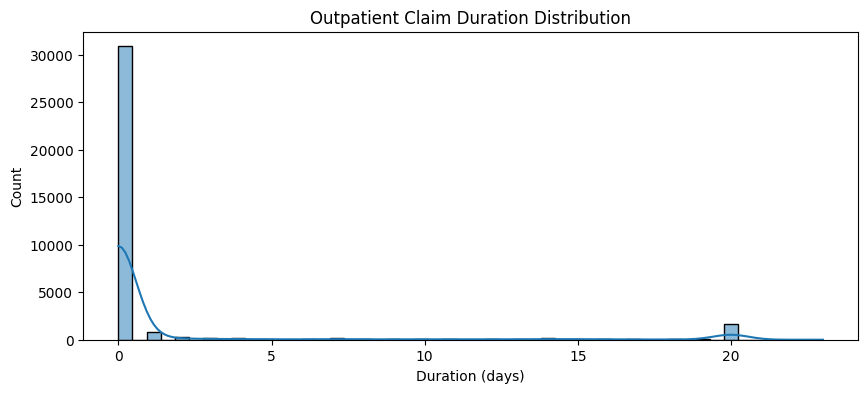

In [ ]:
# ============================================================
# Cell 8 – Outpatient reimbursement + duration distributions
# ============================================================
plt.figure(figsize=(10,4))
sns.boxplot(x=outpatient['InscClaimAmtReimbursed'])
plt.title("Outpatient Claim Amount Distribution")
plt.xlabel("InscClaimAmtReimbursed")
plt.show()

outpatient['ClaimStartDt'] = pd.to_datetime(outpatient['ClaimStartDt'], errors='coerce')
outpatient['ClaimEndDt'] = pd.to_datetime(outpatient['ClaimEndDt'], errors='coerce')
outpatient.dropna(subset=['ClaimStartDt', 'ClaimEndDt'], inplace=True)
outpatient['ClaimDuration'] = (outpatient['ClaimEndDt'] - outpatient['ClaimStartDt']).dt.days

plt.figure(figsize=(10,4))
sns.histplot(outpatient['ClaimDuration'], bins=50, kde=True)
plt.title("Outpatient Claim Duration Distribution")
plt.xlabel("Duration (days)")
plt.show()


In [ ]:
inpatient_agg = inpatient.groupby('Provider').agg({
    'InscClaimAmtReimbursed': 'sum',
    'DeductibleAmtPaid': 'sum',
    'ClaimDuration': 'mean',
    'ClaimID': 'count'
}).reset_index()

inpatient_agg.rename(columns={'ClaimID':'InpatientClaimCount'}, inplace=True)
display(inpatient_agg.head())
display(inpatient_agg.describe())


,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimDuration,InpatientClaimCount
0,PRV51003,36000,4272.0,6.5,4
1,PRV51007,6000,1068.0,4.0,1
2,PRV51021,5000,1068.0,5.0,1
3,PRV51023,11000,1068.0,10.0,1
4,PRV51025,3000,1068.0,1.0,1


,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimDuration,InpatientClaimCount
count,1275.000000,1275.000000,1275.000000,1275.000000
mean,39810.156863,4054.219608,5.605601,3.887059
std,59228.437054,5408.384054,4.107344,5.172513
min,0.000000,0.000000,0.000000,1.000000
25%,8000.000000,1068.000000,3.000000,1.000000
50%,19000.000000,2136.000000,4.714286,2.000000
75%,44500.000000,4272.000000,7.000000,4.000000
max,750400.000000,57672.000000,35.000000,55.000000


In [ ]:
outpatient['ClaimStartDt'] = pd.to_datetime(outpatient['ClaimStartDt'], errors='coerce')
outpatient['ClaimEndDt'] = pd.to_datetime(outpatient['ClaimEndDt'], errors='coerce')

# Drop rows where ClaimStartDt or ClaimEndDt became NaT due to errors
outpatient.dropna(subset=['ClaimStartDt', 'ClaimEndDt'], inplace=True)

outpatient['ClaimDuration'] = (outpatient['ClaimEndDt'] - outpatient['ClaimStartDt']).dt.days

outpatient_agg = outpatient.groupby('Provider').agg({
    'InscClaimAmtReimbursed': 'sum',
    'DeductibleAmtPaid': 'sum',
    'ClaimDuration': 'mean',
    'ClaimID': 'count'
}).reset_index()

outpatient_agg.rename(columns={'ClaimID':'OutpatientClaimCount'}, inplace=True)
display(outpatient_agg.head())
display(outpatient_agg.describe())